In [1]:
# Start by importing all the libraries we will be using

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
from scipy import stats 
import math

In [2]:
# Starting with the csv 
enoe = pd.read_csv('Data/conjunto_de_datos_sdem_enoen_2022_4t.csv', encoding='latin')
dictionary = pd.read_csv('Data/diccionario_datos_sdem_enoen_2022_4t.csv', encoding='latin')


C:\Users\dfloresalbores\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (2,5,8,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Understanding dictionary csv
# Number of entries, columns and types
dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NOMBRE_CAMPO     114 non-null    object
 1   LONGITUD         114 non-null    int64 
 2   TIPO             114 non-null    object
 3   NEMÓNICO         114 non-null    object
 4   CATÁLOGO         90 non-null     object
 5   RANGO_CLAVES     114 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.5+ KB


In [4]:
# The first five entries.
dictionary.head()

,NOMBRE_CAMPO,LONGITUD,TIPO,NEMÓNICO,CATÁLOGO,RANGO_CLAVES
0,Resultado definitivo de la entrevista,2,C,r_def,r_def,"00,15 ..."
1,Número de la localidad,4,C,loc,loc,0001-9998
2,Número de municipio según entidad,3,C,mun,mun,001-575
3,Estrato nacional y estatal,2,C,est,NaN,"Primer dígito 1-4, Segundo dígito 0-4"
4,Estrato de diseño trimestral,4,C,est_d_tri,NaN,0001-9999


In [5]:
# Understanding enoe csv
# Number of entries, columns and types
enoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396629 entries, 0 to 396628
Columns: 114 entries, r_def to mes_cal
dtypes: float64(1), int64(82), object(31)
memory usage: 345.0+ MB


In [6]:
#The first five entries
enoe.head()

,r_def,loc,mun,est,est_d_tri,est_d_men,ageb,t_loc_tri,t_loc_men,cd_a,...,scian,t_tra,emp_ppal,tue_ppal,trans_ppal,mh_fil2,mh_col,sec_ins,tipo,mes_cal
0,0,,2,10,122,,0,1,,1,...,12,1,2,2,0,3,2,2,1,99
1,0,,2,10,122,,0,1,,1,...,0,1,0,0,0,0,0,0,1,99
2,0,,2,10,122,,0,1,,1,...,12,1,2,2,0,3,2,2,1,99
3,0,,2,10,122,,0,1,,1,...,0,1,0,0,0,0,0,0,1,99
4,0,,2,10,122,,0,1,,1,...,14,1,2,2,0,3,2,2,1,99


### Conclusion of first exploration of data

After the first exploration we can find the enoe database is huge and with way too much information, given the timeline I will choose a maximum of 15 columns to work with and strip the rest. 
For that I will need to understand what does each column means and how much valuable information i can get with them.

In [7]:
with pd.option_context('display.max_rows', None,):
   print(dictionary['NOMBRE_CAMPO'])

0                  Resultado definitivo de la entrevista
1                                 Número de la localidad
2                      Número de municipio según entidad
3                             Estrato nacional y estatal
4                           Estrato de diseño trimestral
5                              Estrato de diseño mensual
6                      Número de ageb del marco nacional
7                         Tamaño de localidad trimestral
8                            Tamaño de localidad mensual
9                               Ciudad autorrepresentada
10                                               Entidad
11                                               Control
12                           Unidad primaria de muestreo
13                                  Distribución semanal
14                      Número progresivo de la vivienda
15                                 Vivienda seleccionada
16                                       Número de hogar
17                             

By looking at the data dictionary, I decide to explore further Columns 10, 23, 24, 29, 36, 37, 49, 50, 54, 57, 59, 61, 94, 96, 97
before deciding which ones I want to use. For that I will need to know the codification of each of them (this information is in additionals csv's for each column)

In [8]:
new_dict = dictionary.iloc[[10, 23, 24, 29, 30, 32, 36, 37, 49, 50, 54, 57, 59, 61, 94, 96, 97]]
new_dict

,NOMBRE_CAMPO,LONGITUD,TIPO,NEMÓNICO,CATÁLOGO,RANGO_CLAVES
10,Entidad,2,C,ent,ent,[01-32]
23,Pregunta 8 Sexo,1,C,sex,sex,"1,2"
24,Pregunta 9 Edad,2,C,eda,eda,00-99
29,Pregunta 12 ¿Sabe leer y escribir un recado...?,1,C,cs_p12,cs_p12,"1-2,9"
30,Pregunta 13 ¿Hasta qué año aprobó... en la esc...,2,C,cs_p13_1,cs_p13_1,"00-09,99"
32,Pregunta 14 Clave de la carrera,6,C,cs_p14_c,cs_p14_c,Catálogo CMPE (carreras)
36,Pregunta 18 En total cuántas hijas e hijos que...,2,C,n_hij,NaN,"00-25,99"
37,Pregunta 19 Estado conyugal,1,C,e_con,e_con,"1-6,9"
49,Urbano/Rural,1,N,ur,ur,[1-2]
50,Zona salarial,1,N,zona,zona,[1-2]


In [9]:
#Let's give a look to those files, the name of the files is on our dictionary column called "CATÁLOGO"

entity_c = pd.read_csv('Data/ent.csv', encoding='latin')
sex_c = pd.read_csv('Data/sex.csv', encoding='latin')
age_c = pd.read_csv('Data/eda.csv', encoding='latin')
literacy_c = pd.read_csv('Data/cs_p12.csv', encoding='latin')
scholarship_c = pd.read_csv('Data/cs_p13_1.csv', encoding='latin')
career_c = pd.read_csv('Data/cs_p14_c.csv', encoding='latin')
maritalstatus_c = pd.read_csv('Data/e_con.csv', encoding='latin')
urban_c = pd.read_csv('Data/ur.csv', encoding='latin')
zone_c = pd.read_csv('Data/zona.csv', encoding='latin')
ocupy_pos_c = pd.read_csv('Data/pos_ocu.csv', encoding='latin')
sector_c = pd.read_csv('Data/rama.csv', encoding='latin')
incomelevel_c = pd.read_csv('Data/ing7c.csv', encoding='latin')
yearsstudy_c = pd.read_csv('Data/anios_esc.csv', encoding='latin')
pea_c = pd.read_csv('Data/clase1.csv', encoding= 'latin')

In [10]:
#  Here are the codification for each of our columns
# Place of Residence
print(new_dict['NOMBRE_CAMPO'][10])
entity_c

Entidad


,CVE,DESCRIP
0,1,Aguascalientes
1,2,Baja California
2,3,Baja California Sur
3,4,Campeche
4,5,Coahuila
5,6,Colima
6,7,Chiapas
7,8,Chihuahua
8,9,Ciudad de México
9,10,Durango


In [11]:
#Gender
print(new_dict['NOMBRE_CAMPO'][23])
sex_c

Pregunta 8 Sexo


,CVE,DESCRIP
0,1,Hombre
1,2,Mujer


In [12]:
#Age
print(new_dict['NOMBRE_CAMPO'][24])
age_c 

Pregunta 9 Edad


,CVE,DESCRIP
0,0,Años
1,1,Año
2,2,Años
3,3,Años
4,4,Años
...,...,...
95,95,Años
96,96,Años
97,97,Años y más
98,98,Años no especificados de 12 años y más


In [13]:
#Knows to read and write?
print(new_dict['NOMBRE_CAMPO'][29])
literacy_c

Pregunta 12 ¿Sabe leer y escribir un recado...?


,CVE,DESCRIP
0,1,Sí
1,2,No
2,9,No sabe


In [14]:
#Scholarship?
print(new_dict['NOMBRE_CAMPO'][30])
scholarship_c

Pregunta 13 ¿Hasta qué año aprobó... en la escuela?


,CVE,DESCRIP
0,0,Ninguno
1,1,Preescolar
2,2,Primaria
3,3,Secundaria
4,4,Preparatoria o bachillerato
5,5,Normal
6,6,Carrera técnica
7,7,Profesional
8,8,Maestría
9,9,Doctorado


In [15]:
#Knows to read and write?
print(new_dict['NOMBRE_CAMPO'][32])
career_c

Pregunta 14 Clave de la carrera


,CVE,DESCRIP
0,11000,Planes multidisciplinarios o generales del cam...
1,11100,Diseño curricular y pedagogía
2,11200,"Planeación, evaluación e investigación educativa"
3,11300,Orientación e intervención educativa
4,11400,Tecnología y comunicación educativa
...,...,...
181,102100,Servicios de transporte
182,103100,Seguridad para el trabajo
183,104100,Seguridad pública
184,104200,Servicios militares


In [16]:
#Marital Status
print(new_dict['NOMBRE_CAMPO'][37])
maritalstatus_c

Pregunta 19 Estado conyugal


,CVE,DESCRIP
0,1,Vive con su pareja en unión libre
1,2,Está separado(a)
2,3,Está divorciado(a)
3,4,Está viudo(a)
4,5,Está casado(a)
5,6,Está soltero(a)
6,9,No sabe


In [17]:
#Urban or Rural
print(new_dict['NOMBRE_CAMPO'][49])
urban_c

Urbano/Rural


,CVE,DESCRIP
0,1,Muestra urbana
1,2,Muestra complemento y rural


In [18]:
#Income Zone
print(new_dict['NOMBRE_CAMPO'][50])
zone_c

Zona salarial


,CVE,DESCRIP
0,0,No aplica
1,1,Zona 1 Frontera norte
2,2,Zona 2 Resto del paÃ­s


In [19]:
#Population by employed and unemployed
print(new_dict['NOMBRE_CAMPO'][54])
pea_c

Clasificación de la población en PEA y PNEA


,CVE,DESCRIP
0,0,No aplica
1,1,Población económicamente activa
2,2,Población no económicamente activa


In [20]:
#Population employed by position 
print(new_dict['NOMBRE_CAMPO'][57])
ocupy_pos_c

Clasificación de la población ocupada por posición en la ocupación


,CVE,DESCRIP
0,0,No aplica
1,1,Trabajadores subordinados y remunerados
2,2,Empleadores
3,3,Trabajadores por cuenta propia
4,4,Trabajadores sin pago
5,5,No especificado


In [21]:
#Population by economic activity sector
print(new_dict['NOMBRE_CAMPO'][59])
sector_c

Clasificación de la población ocupada por sector de actividad económica


,CVE,DESCRIP
0,0,No aplica
1,6,Agropecuario
2,1,Construcción
3,2,Industria manufacturera
4,3,Comercio
5,4,Servicios
6,5,Otros
7,7,No especificado


In [22]:
#Population employed by level of income #Not sure to use this one, it could be useful as a target for a clasification model.
print(new_dict['NOMBRE_CAMPO'][61])
incomelevel_c

Clasificación de la población ocupada por nivel de ingreso


,CVE,DESCRIP
0,0,No aplica
1,1,Hasta un salario mínimo
2,2,Más de 1 hasta 2 salarios mínimos
3,3,Más de 2 hasta 3 salarios mínimos
4,4,Más de 3 hasta 5 salarios mínimos
5,5,Más de 5 salarios mínimos
6,6,No recibe ingresos
7,7,No especificado


In [23]:
#Population by years of study. Not sure to use this one or scholarity
print(new_dict['NOMBRE_CAMPO'][94])
yearsstudy_c

Años de escolaridad


,CVE,DESCRIP
0,0,No aplica
1,1,Un año de escolaridad
2,2,dos años de escolaridad
3,3,tres años de escolaridad
4,4,cuatro años de escolaridad
5,5,cinco años de escolaridad
6,6,seis años de escolaridad
7,7,siete años de escolaridad
8,8,ocho años de escolaridad
9,9,nueve años de escolaridad


Now that I have a better understanding of the data I will proceed to select my columns from enoe csv and change the column names. 

In [24]:
# Here are the names of the columns
new_dict['NEMÓNICO']

10          ent
23          sex
24          eda
29       cs_p12
30     cs_p13_1
32     cs_p14_c
36        n_hij
37        e_con
49           ur
50         zona
54       clase1
57      pos_ocu
59         rama
61        ing7c
94    anios_esc
96      ingocup
97    ing_x_hrs
Name: NEMÓNICO, dtype: object

In [25]:
#Selecting the columns by their names and preview
df = enoe[['ent', 'sex', 'eda', 'cs_p12','cs_p13_1', 'cs_p14_c','n_hij','e_con','ur', 'zona', 'clase1','pos_ocu', 'rama', 'ing7c', 'anios_esc', 'ingocup', 'ing_x_hrs']]
df.head(5)

,ent,sex,eda,cs_p12,cs_p13_1,cs_p14_c,n_hij,e_con,ur,zona,clase1,pos_ocu,rama,ing7c,anios_esc,ingocup,ing_x_hrs
0,9,1,59,1,7,51100,,6,1,2,1,1,4,7,16,0,0.0000
1,9,2,31,1,7,33200,0,6,1,2,2,0,0,0,16,0,0.0000
2,9,1,30,1,7,61000,,6,1,2,1,1,4,4,16,16000,74.4186
3,9,1,15,1,3,,,6,1,2,2,0,0,0,8,0,0.0000
4,9,1,42,1,7,62100,,2,1,2,1,1,4,7,16,0,0.0000


In [26]:
# Preview of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396629 entries, 0 to 396628
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ent        396629 non-null  int64  
 1   sex        396629 non-null  object 
 2   eda        396629 non-null  object 
 3   cs_p12     396629 non-null  object 
 4   cs_p13_1   396629 non-null  object 
 5   cs_p14_c   396629 non-null  object 
 6   n_hij      396629 non-null  object 
 7   e_con      396629 non-null  object 
 8   ur         396629 non-null  int64  
 9   zona       396629 non-null  int64  
 10  clase1     396629 non-null  int64  
 11  pos_ocu    396629 non-null  int64  
 12  rama       396629 non-null  int64  
 13  ing7c      396629 non-null  int64  
 14  anios_esc  396629 non-null  int64  
 15  ingocup    396629 non-null  int64  
 16  ing_x_hrs  396629 non-null  float64
dtypes: float64(1), int64(9), object(7)
memory usage: 51.4+ MB


In [27]:
#Renaming our columns for better understanding
df.rename(columns = {'ent': 'Residence', 'sex': 'Gender', 'eda': 'Age', 'cs_p12': 'Literacy', 'cs_p13_1': 'Scholarship', 'cs_p14_c': 'Career','n_hij': 'Num Children','e_con': 'Marital Status','ur':'Urban or Rural', 'zona': 'Economic Zone', 'clase1':'Un/Employed','pos_ocu':'By Position', 'rama':'By Economic Sector', 'ing7c':'By Income Level', 'anios_esc': 'Years of Study', 'ingocup':'Monthly Income', 'ing_x_hrs':'Income by hour' }, inplace = True)
df.head(3)

C:\Users\dfloresalbores\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,Un/Employed,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
0,9,1,59,1,7,51100,,6,1,2,1,1,4,7,16,0,0.0000
1,9,2,31,1,7,33200,0,6,1,2,2,0,0,0,16,0,0.0000
2,9,1,30,1,7,61000,,6,1,2,1,1,4,4,16,16000,74.4186


In [28]:
# As we are interested in just the employed population, we will delete all the entries for unemployed and no aplicable
df.drop(df[df['Un/Employed'] == 0].index, inplace=True)
df

C:\Users\dfloresalbores\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,Un/Employed,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
0,9,1,59,1,7,51100,,6,1,2,1,1,4,7,16,0,0.00000
1,9,2,31,1,7,33200,0,6,1,2,2,0,0,0,16,0,0.00000
2,9,1,30,1,7,61000,,6,1,2,1,1,4,4,16,16000,74.41860
3,9,1,15,1,3,,,6,1,2,2,0,0,0,8,0,0.00000
4,9,1,42,1,7,62100,,2,1,2,1,1,4,7,16,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389430,32,1,54,1,2,,,5,2,2,1,3,4,7,2,0,0.00000
389431,32,2,57,1,2,,6,5,2,2,2,0,0,0,3,0,0.00000
389432,32,1,67,1,2,,,5,2,2,1,3,6,1,4,583,2.76697
389433,32,2,69,1,2,,13,5,2,2,2,0,0,0,2,0,0.00000


In [29]:
df.drop(df[df['Un/Employed'] == 2].index, inplace=True)
df

C:\Users\dfloresalbores\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,Un/Employed,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
0,9,1,59,1,7,51100,,6,1,2,1,1,4,7,16,0,0.00000
2,9,1,30,1,7,61000,,6,1,2,1,1,4,4,16,16000,74.41860
4,9,1,42,1,7,62100,,2,1,2,1,1,4,7,16,0,0.00000
5,9,2,36,1,7,101500,1,5,1,2,1,1,4,7,16,0,0.00000
6,9,1,43,1,7,101600,,5,1,2,1,1,4,7,16,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389425,32,1,62,1,2,,,5,2,2,1,1,1,2,6,7740,36.00000
389428,32,2,31,1,4,,0,4,2,2,1,1,4,2,12,7740,37.50000
389429,32,2,18,1,4,,0,6,2,2,1,1,3,2,12,7955,30.83333
389430,32,1,54,1,2,,,5,2,2,1,3,4,7,2,0,0.00000


In [30]:
df['Un/Employed'].describe()

count    186120.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Un/Employed, dtype: float64

In [31]:
#As we will not need anymore that column we will just delete it from our new df
employed_df = df.drop('Un/Employed',1)
employed_df

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
0,9,1,59,1,7,51100,,6,1,2,1,4,7,16,0,0.00000
2,9,1,30,1,7,61000,,6,1,2,1,4,4,16,16000,74.41860
4,9,1,42,1,7,62100,,2,1,2,1,4,7,16,0,0.00000
5,9,2,36,1,7,101500,1,5,1,2,1,4,7,16,0,0.00000
6,9,1,43,1,7,101600,,5,1,2,1,4,7,16,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389425,32,1,62,1,2,,,5,2,2,1,1,2,6,7740,36.00000
389428,32,2,31,1,4,,0,4,2,2,1,4,2,12,7740,37.50000
389429,32,2,18,1,4,,0,6,2,2,1,3,2,12,7955,30.83333
389430,32,1,54,1,2,,,5,2,2,3,4,7,2,0,0.00000


In [32]:
#we search for nulls due to we can see in the preview that some colmns has no data
employed_df.isnull().sum(axis = 0)

Residence             0
Gender                0
Age                   0
Literacy              0
Scholarship           0
Career                0
Num Children          0
Marital Status        0
Urban or Rural        0
Economic Zone         0
By Position           0
By Economic Sector    0
By Income Level       0
Years of Study        0
Monthly Income        0
Income by hour        0
dtype: int64

In [33]:
#As we know theres some blanks in our dataframe, we will review our data type
employed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186120 entries, 0 to 389432
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Residence           186120 non-null  int64  
 1   Gender              186120 non-null  object 
 2   Age                 186120 non-null  object 
 3   Literacy            186120 non-null  object 
 4   Scholarship         186120 non-null  object 
 5   Career              186120 non-null  object 
 6   Num Children        186120 non-null  object 
 7   Marital Status      186120 non-null  object 
 8   Urban or Rural      186120 non-null  int64  
 9   Economic Zone       186120 non-null  int64  
 10  By Position         186120 non-null  int64  
 11  By Economic Sector  186120 non-null  int64  
 12  By Income Level     186120 non-null  int64  
 13  Years of Study      186120 non-null  int64  
 14  Monthly Income      186120 non-null  int64  
 15  Income by hour      186120 non-nul

In [34]:
#Most likely there are spaces instead of nulls, so we are removing the spaces from all our object data
employed_df['Gender'] = employed_df['Gender'].replace(' ', '', regex=True)
employed_df['Num Children'] = employed_df['Num Children'].replace(' ', '', regex=True)
employed_df['Age'] = employed_df['Age'].replace(' ', '', regex=True)
employed_df['Literacy'] = employed_df['Literacy'].replace(' ', '', regex=True)
employed_df['Marital Status'] = employed_df['Marital Status'].replace(' ', '', regex=True)
employed_df['Scholarship'] = employed_df['Scholarship'].replace(' ', '', regex=True)
employed_df['Career'] = employed_df['Career'].replace(' ', '', regex=True)

In [35]:
#And converting now to numerical data
employed_df['Gender'] = pd.to_numeric(employed_df['Gender'])
employed_df['Num Children'] = pd.to_numeric(employed_df['Num Children'])
employed_df['Age'] = pd.to_numeric(employed_df['Age'])
employed_df['Literacy'] = pd.to_numeric(employed_df['Literacy'])
employed_df['Marital Status'] = pd.to_numeric(employed_df['Marital Status'])
employed_df['Scholarship'] = pd.to_numeric(employed_df['Scholarship'])
employed_df['Career'] = pd.to_numeric(employed_df['Career'])

In [36]:
#Preview
employed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186120 entries, 0 to 389432
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Residence           186120 non-null  int64  
 1   Gender              186120 non-null  int64  
 2   Age                 186120 non-null  int64  
 3   Literacy            186120 non-null  int64  
 4   Scholarship         186120 non-null  int64  
 5   Career              57145 non-null   float64
 6   Num Children        77322 non-null   float64
 7   Marital Status      186120 non-null  int64  
 8   Urban or Rural      186120 non-null  int64  
 9   Economic Zone       186120 non-null  int64  
 10  By Position         186120 non-null  int64  
 11  By Economic Sector  186120 non-null  int64  
 12  By Income Level     186120 non-null  int64  
 13  Years of Study      186120 non-null  int64  
 14  Monthly Income      186120 non-null  int64  
 15  Income by hour      186120 non-nul

In [37]:
employed_df.isnull().sum(axis = 0)

Residence                  0
Gender                     0
Age                        0
Literacy                   0
Scholarship                0
Career                128975
Num Children          108798
Marital Status             0
Urban or Rural             0
Economic Zone              0
By Position                0
By Economic Sector         0
By Income Level            0
Years of Study             0
Monthly Income             0
Income by hour             0
dtype: int64

In [38]:
employed_df['Num Children'].describe()

count    77322.000000
mean         1.831639
std          2.017039
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max         99.000000
Name: Num Children, dtype: float64

In [39]:
#As we can see there is a lot of data unspecified. For that i will go column by column analysing the best way to handled nulls.
# First Age, according to our description 98 handles unespecified age above 12 years old
employed_df[employed_df['Age']==98]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
133,9,1,98,1,3,NaN,NaN,6,1,2,1,4,7,9,0,0.00000
4077,9,2,98,1,4,NaN,1.0,5,1,2,1,4,2,12,9000,46.51163
4078,9,1,98,1,4,NaN,NaN,5,1,2,1,4,2,12,9000,49.83389
7018,9,2,98,1,7,51200.0,0.0,6,1,2,1,4,3,16,12000,55.81395
7021,9,2,98,1,6,101400.0,1.0,6,1,2,1,4,3,12,14000,65.11628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372809,24,1,98,2,0,NaN,NaN,2,2,2,1,6,1,0,3870,18.75000
374153,24,1,98,2,0,NaN,NaN,1,2,2,1,4,7,0,0,0.00000
374155,24,1,98,2,0,NaN,NaN,6,2,2,1,4,7,0,0,0.00000
376432,26,2,98,1,2,NaN,4.0,2,2,2,1,2,2,6,7740,37.50000


In [40]:
#As they are not too many (128 entries) we will just drop them
employed_df = employed_df.drop(employed_df[employed_df['Age']==98].index)

In [41]:
employed_df['Age'].describe()

count    185992.000000
mean         39.720144
std          14.332345
min          12.000000
25%          28.000000
50%          39.000000
75%          50.000000
max          97.000000
Name: Age, dtype: float64

In [42]:
# Literacy, according to our description 9 handles unespecified 
employed_df[employed_df['Literacy']==9]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
83658,30,1,29,9,99,NaN,NaN,1,1,2,1,1,2,99,7740,35.29412
96453,1,2,50,9,99,NaN,99.0,9,1,2,1,4,2,99,0,0.00000
182830,30,1,22,9,99,NaN,NaN,1,1,2,1,4,2,99,7000,0.00000
228625,4,1,57,9,2,NaN,NaN,1,1,2,3,6,1,1,2150,5.95238
257975,12,1,57,9,99,NaN,NaN,5,2,2,3,2,1,99,4300,20.83333
257979,12,2,57,9,99,NaN,3.0,5,2,2,1,4,2,99,6000,28.47651
319552,2,1,40,9,2,NaN,NaN,1,2,1,1,6,1,1,7525,50.00000
364754,20,1,13,9,2,NaN,NaN,6,2,2,1,1,1,5,5160,26.08696
371537,23,1,71,9,0,NaN,NaN,5,2,2,2,6,7,0,0,0.00000
371538,23,2,69,9,0,NaN,7.0,5,2,2,3,2,1,0,1075,25.00000


In [43]:
# as they are not many, we will drop them
employed_df = employed_df.drop(employed_df[employed_df['Literacy']==9].index)

In [44]:
employed_df['Literacy'].value_counts()

1    182424
2      3557
Name: Literacy, dtype: int64

In [45]:
# Marital Status, according to our description 9 handles unespecified 
employed_df[employed_df['Marital Status']==9]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
90281,12,1,19,1,4,NaN,NaN,9,1,2,1,4,1,10,0,0.00000
150577,26,2,57,1,3,NaN,99.0,9,1,2,1,4,2,9,6450,37.50000
170477,4,1,61,1,3,NaN,NaN,9,1,2,3,3,1,9,5160,20.00000
173695,17,2,56,1,3,NaN,3.0,9,1,2,1,4,7,9,0,0.00000
200714,22,1,50,1,7,41100.0,NaN,9,1,2,3,3,7,16,0,0.00000
201367,22,1,41,1,3,NaN,NaN,9,1,2,1,4,4,9,0,0.00000
235600,2,1,26,1,4,NaN,NaN,9,1,1,1,3,1,12,7740,37.50000
293482,26,2,57,1,3,NaN,3.0,9,2,2,1,2,1,9,4300,20.00000
329823,27,1,56,1,3,NaN,NaN,9,2,2,1,4,2,9,6880,33.33333
351006,12,1,45,2,0,NaN,NaN,9,2,2,1,6,2,0,6450,35.71429


In [46]:
# the same
employed_df = employed_df.drop(employed_df[employed_df['Marital Status']==9].index)
employed_df['Marital Status'].value_counts()

5    70041
6    59899
1    36142
2     9728
4     5448
3     4713
Name: Marital Status, dtype: int64

In [47]:
#Urban or Rural has no unspecified
print("Urban or Rural")
print(employed_df['Urban or Rural'].value_counts())

Urban or Rural
1    123966
2     62005
Name: Urban or Rural, dtype: int64


In [48]:
# Economic Zone, according to our description 0 handles unespecified 
employed_df[employed_df['Economic Zone']==0]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour


In [49]:
# not Economic Zone
print("Economic Zone")
print(employed_df['Economic Zone'].value_counts())

Economic Zone
2    170386
1     15585
Name: Economic Zone, dtype: int64


In [50]:
# Employee by Position, according to our description 5 handles unespecified 
employed_df[employed_df['By Position']==5]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour


Even though there is no unespecified entries, we need to verified for not applicable ones

In [51]:
# Employee by Position, according to our description 0 handles not applicable
employed_df[employed_df['By Position']==0]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
8,9,2,72,1,2,NaN,3.0,4,1,2,0,0,0,4,0,0.0
24,9,1,24,1,4,NaN,NaN,6,1,2,0,0,0,12,0,0.0
118,9,2,41,1,4,NaN,0.0,6,1,2,0,0,0,12,0,0.0
122,9,1,20,1,3,NaN,NaN,6,1,2,0,0,0,7,0,0.0
128,9,1,33,1,3,NaN,NaN,2,1,2,0,0,0,9,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388673,32,2,37,1,3,NaN,0.0,6,2,2,0,0,0,7,0,0.0
389148,32,2,28,1,4,NaN,2.0,5,2,2,0,0,0,12,0,0.0
389164,32,2,23,1,7,31100.0,0.0,6,2,2,0,0,0,17,0,0.0
389259,32,1,26,1,4,NaN,NaN,6,2,2,0,0,0,11,0,0.0


In [52]:
# There is a significant amount of entries with no applicable.
print("Employee by Position")
print(employed_df['By Position'].value_counts())

Employee by Position
1    127128
3     37075
2      9411
4      6926
0      5431
Name: By Position, dtype: int64


Before deciding I will check out the other feautures that are related

In [53]:
# Employee by Economic Sector, according to our description 7 handles unespecified 
employed_df[employed_df['By Economic Sector']==7]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
304,9,1,75,1,2,NaN,NaN,1,1,2,1,7,2,6,9000,26.83363
512,9,1,21,1,4,NaN,NaN,6,1,2,3,7,1,12,3440,44.44444
834,9,1,42,1,7,42100.0,NaN,6,1,2,2,7,7,16,0,0.00000
1188,9,1,21,1,4,NaN,NaN,6,1,2,1,7,2,12,5590,27.08333
1453,9,2,61,1,7,41100.0,2.0,3,1,2,1,7,7,16,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387169,32,1,13,1,3,NaN,NaN,6,2,2,1,7,1,7,2580,20.00000
387533,32,2,50,1,2,NaN,3.0,1,2,2,1,7,7,6,0,0.00000
388592,32,2,49,1,3,NaN,3.0,5,2,2,1,7,1,9,860,100.00000
388831,32,1,40,1,3,NaN,NaN,5,2,2,1,7,1,9,4300,16.66667


In [54]:
# Employee by Economic Sector, according to our description 0 handles not applicable
employed_df[employed_df['By Economic Sector']==0]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
8,9,2,72,1,2,NaN,3.0,4,1,2,0,0,0,4,0,0.0
24,9,1,24,1,4,NaN,NaN,6,1,2,0,0,0,12,0,0.0
118,9,2,41,1,4,NaN,0.0,6,1,2,0,0,0,12,0,0.0
122,9,1,20,1,3,NaN,NaN,6,1,2,0,0,0,7,0,0.0
128,9,1,33,1,3,NaN,NaN,2,1,2,0,0,0,9,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388673,32,2,37,1,3,NaN,0.0,6,2,2,0,0,0,7,0,0.0
389148,32,2,28,1,4,NaN,2.0,5,2,2,0,0,0,12,0,0.0
389164,32,2,23,1,7,31100.0,0.0,6,2,2,0,0,0,17,0,0.0
389259,32,1,26,1,4,NaN,NaN,6,2,2,0,0,0,11,0,0.0


In [55]:
# Employee by Income Level, according to our description 7 handles not specified
employed_df[employed_df['By Income Level']==7]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,By Income Level,Years of Study,Monthly Income,Income by hour
0,9,1,59,1,7,51100.0,NaN,6,1,2,1,4,7,16,0,0.0
4,9,1,42,1,7,62100.0,NaN,2,1,2,1,4,7,16,0,0.0
5,9,2,36,1,7,101500.0,1.0,5,1,2,1,4,7,16,0,0.0
6,9,1,43,1,7,101600.0,NaN,5,1,2,1,4,7,16,0,0.0
41,9,2,57,1,7,12100.0,2.0,6,1,2,1,4,7,16,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389414,32,1,52,1,5,12200.0,NaN,5,2,2,1,4,7,13,0,0.0
389416,32,1,20,1,4,NaN,NaN,6,2,2,1,3,7,12,0,0.0
389420,32,1,66,1,2,NaN,NaN,5,2,2,3,6,7,6,0,0.0
389421,32,2,56,1,2,NaN,5.0,5,2,2,1,3,7,6,0,0.0


In [56]:
#By Position
# 0 - Not applicables
# 5 - No specified

#By Economic Sector
# 0 - Not applicables
# 7 - Not specified

#By Income Level
# 0 - Not applicables
# 7 - Not specified
print("Employee by Position")
print(employed_df['By Position'].value_counts())
print("Employee by Economic Sector")
print(employed_df['By Economic Sector'].value_counts())
print("by Income Level")
print(employed_df['By Income Level'].value_counts())

Employee by Position
1    127128
3     37075
2      9411
4      6926
0      5431
Name: By Position, dtype: int64
Employee by Economic Sector
4    83492
3    35420
2    29838
6    14445
1    14364
0     5431
5     1691
7     1290
Name: By Economic Sector, dtype: int64
by Income Level
2    62698
1    50442
7    26702
3    20523
4     8690
6     8485
0     5431
5     3000
Name: By Income Level, dtype: int64


In [57]:
# It seems there are too many unspecified entries with income level, so I wil drop that entire column for now and save a df with it if i need it later
employed_with_level = employed_df

In [58]:
new_employed = employed_df.drop('By Income Level',1)

In [59]:
new_employed

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Years of Study,Monthly Income,Income by hour
0,9,1,59,1,7,51100.0,NaN,6,1,2,1,4,16,0,0.00000
2,9,1,30,1,7,61000.0,NaN,6,1,2,1,4,16,16000,74.41860
4,9,1,42,1,7,62100.0,NaN,2,1,2,1,4,16,0,0.00000
5,9,2,36,1,7,101500.0,1.0,5,1,2,1,4,16,0,0.00000
6,9,1,43,1,7,101600.0,NaN,5,1,2,1,4,16,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389425,32,1,62,1,2,NaN,NaN,5,2,2,1,1,6,7740,36.00000
389428,32,2,31,1,4,NaN,0.0,4,2,2,1,4,12,7740,37.50000
389429,32,2,18,1,4,NaN,0.0,6,2,2,1,3,12,7955,30.83333
389430,32,1,54,1,2,NaN,NaN,5,2,2,3,4,2,0,0.00000


In [60]:
# By economic Sector, according to our description 7 handles unespecified 
new_employed[new_employed['By Economic Sector']==7]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Years of Study,Monthly Income,Income by hour
304,9,1,75,1,2,NaN,NaN,1,1,2,1,7,6,9000,26.83363
512,9,1,21,1,4,NaN,NaN,6,1,2,3,7,12,3440,44.44444
834,9,1,42,1,7,42100.0,NaN,6,1,2,2,7,16,0,0.00000
1188,9,1,21,1,4,NaN,NaN,6,1,2,1,7,12,5590,27.08333
1453,9,2,61,1,7,41100.0,2.0,3,1,2,1,7,16,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387169,32,1,13,1,3,NaN,NaN,6,2,2,1,7,7,2580,20.00000
387533,32,2,50,1,2,NaN,3.0,1,2,2,1,7,6,0,0.00000
388592,32,2,49,1,3,NaN,3.0,5,2,2,1,7,9,860,100.00000
388831,32,1,40,1,3,NaN,NaN,5,2,2,1,7,9,4300,16.66667


In [61]:
new_employed = new_employed.drop(new_employed[new_employed['By Economic Sector']==7].index)
new_employed['By Economic Sector'].value_counts()

4    83492
3    35420
2    29838
6    14445
1    14364
0     5431
5     1691
Name: By Economic Sector, dtype: int64

In [62]:
# Years of Study, according to our description 99 handles unespecified 
new_employed[new_employed['Years of Study']==99]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Years of Study,Monthly Income,Income by hour
1399,9,1,25,1,4,NaN,NaN,6,1,2,1,4,99,0,0.00000
3915,9,1,31,1,4,NaN,NaN,6,1,2,1,4,99,0,0.00000
3916,9,2,29,1,4,NaN,0.0,6,1,2,0,0,99,0,0.00000
5096,9,1,44,1,99,NaN,NaN,6,1,2,1,3,99,21500,92.59259
6854,9,1,69,1,7,71300.0,NaN,3,1,2,3,3,99,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386122,31,2,48,1,3,NaN,2.0,5,2,2,1,2,99,2580,20.00000
386131,31,2,58,1,2,NaN,5.0,5,2,2,3,2,99,500,4.15282
386586,31,1,19,1,99,NaN,NaN,6,2,2,1,1,99,7740,39.13043
387244,32,2,34,1,6,62200.0,2.0,5,2,2,1,2,99,2150,20.83333


In [63]:
new_employed = new_employed.drop(new_employed[new_employed['Years of Study']==0].index)


In [64]:
# Scholarship, according to our description 99 handles unespecified 
new_employed[new_employed['Scholarship']==99]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Years of Study,Monthly Income,Income by hour
5096,9,1,44,1,99,NaN,NaN,6,1,2,1,3,99,21500,92.59259
11493,15,1,26,1,99,NaN,NaN,1,1,2,1,3,99,0,0.00000
22266,14,1,38,1,99,NaN,NaN,6,1,2,1,3,99,8600,44.44444
23127,19,1,49,1,99,NaN,NaN,5,1,2,1,4,99,12900,83.33333
23521,19,1,55,1,99,NaN,NaN,1,1,2,1,4,99,6450,22.72727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376650,26,1,47,1,99,NaN,NaN,1,2,2,1,3,99,6450,26.78571
380485,28,1,50,1,99,NaN,NaN,5,2,2,3,6,99,3000,12.45847
380504,28,1,70,1,99,NaN,NaN,1,2,2,1,6,99,6450,107.14286
383095,30,1,62,1,99,NaN,NaN,1,2,2,1,6,99,7500,83.05648


In [65]:
# 1 - not applicable
new_employed = new_employed.drop(new_employed[new_employed['Scholarship']==99].index)
new_employed = new_employed.drop(new_employed[new_employed['Scholarship']==1].index)
new_employed['Scholarship'].value_counts()

3    50210
7    45934
4    43693
2    29690
6     5961
8     4019
9      643
5      227
Name: Scholarship, dtype: int64

In [66]:
# Career, according to our description 999999 handles unespecified 
new_employed[new_employed['Career']==999999]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Years of Study,Monthly Income,Income by hour
203,9,1,47,1,7,999999.0,NaN,1,1,2,1,3,14,15000,87.20930
1131,9,1,31,1,7,999999.0,NaN,6,1,2,1,3,14,0,0.00000
1473,9,1,33,1,7,999999.0,NaN,6,1,2,1,2,16,0,0.00000
1514,9,2,37,1,7,999999.0,0.0,6,1,2,1,4,16,0,0.00000
1777,9,1,30,1,7,999999.0,NaN,6,1,2,1,3,16,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378216,27,2,32,1,8,999999.0,2.0,5,2,2,1,4,18,16000,106.31229
380957,29,2,36,1,7,999999.0,2.0,1,2,2,1,4,15,16000,93.02326
381416,29,1,20,1,7,999999.0,NaN,6,2,2,4,6,13,0,0.00000
381822,29,2,24,1,7,999999.0,0.0,5,2,2,1,3,17,0,0.00000


## Ask

In [67]:
#We are not sure the unespecified are because the person has no university level studies or if it is because they didn't answer
new_employed['Career'].value_counts()

41400.0    4802
33100.0    4579
42100.0    4177
92100.0    2470
71700.0    2330
           ... 
91330.0       1
91307.0       1
92203.0       1
91311.0       1
81000.0       1
Name: Career, Length: 173, dtype: int64

In [68]:
# Num Children, according to our description 99 handles unespecified 
new_employed[new_employed['Num Children']==99]

,Residence,Gender,Age,Literacy,Scholarship,Career,Num Children,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Years of Study,Monthly Income,Income by hour
28388,19,2,40,1,3,NaN,99.0,6,1,2,1,4,9,0,0.00000
53456,5,2,59,1,7,41100.0,99.0,5,1,2,2,3,17,0,0.00000
153658,26,2,43,1,7,11500.0,99.0,1,1,2,1,4,16,14400,83.72093
178277,30,2,44,1,8,11500.0,99.0,1,1,2,1,4,18,0,0.00000
194922,32,2,30,1,7,92100.0,99.0,6,1,2,1,4,14,0,0.00000
263911,26,2,55,1,2,NaN,99.0,2,2,1,1,3,3,8600,33.33333
372876,24,2,43,1,3,NaN,99.0,6,2,2,1,4,9,6450,50.00000


In [69]:
new_employed = new_employed.drop(new_employed[new_employed['Num Children']==99].index)
new_employed['Num Children'].value_counts()

0.0     22021
2.0     18304
3.0     13666
1.0     12415
4.0      5030
5.0      1958
6.0       871
7.0       414
8.0       205
9.0       100
10.0       78
11.0       46
12.0       28
13.0       11
14.0        7
25.0        6
21.0        3
15.0        2
16.0        2
17.0        1
20.0        1
Name: Num Children, dtype: int64

In [70]:
new_employed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180370 entries, 0 to 389432
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Residence           180370 non-null  int64  
 1   Gender              180370 non-null  int64  
 2   Age                 180370 non-null  int64  
 3   Literacy            180370 non-null  int64  
 4   Scholarship         180370 non-null  int64  
 5   Career              56780 non-null   float64
 6   Num Children        75169 non-null   float64
 7   Marital Status      180370 non-null  int64  
 8   Urban or Rural      180370 non-null  int64  
 9   Economic Zone       180370 non-null  int64  
 10  By Position         180370 non-null  int64  
 11  By Economic Sector  180370 non-null  int64  
 12  Years of Study      180370 non-null  int64  
 13  Monthly Income      180370 non-null  int64  
 14  Income by hour      180370 non-null  float64
dtypes: float64(3), int64(12)
memory us

In [71]:
new_employed.isnull().sum(axis = 0)

Residence                  0
Gender                     0
Age                        0
Literacy                   0
Scholarship                0
Career                123590
Num Children          105201
Marital Status             0
Urban or Rural             0
Economic Zone              0
By Position                0
By Economic Sector         0
Years of Study             0
Monthly Income             0
Income by hour             0
dtype: int64

In [72]:
# as there are too many null entries and we don't know why, we are going to delete this column.
new_employed = new_employed.drop('Num Children',1)

In [73]:
new_employed[new_employed['Monthly Income']==0]

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Years of Study,Monthly Income,Income by hour
0,9,1,59,1,7,51100.0,6,1,2,1,4,16,0,0.0
4,9,1,42,1,7,62100.0,2,1,2,1,4,16,0,0.0
5,9,2,36,1,7,101500.0,5,1,2,1,4,16,0,0.0
6,9,1,43,1,7,101600.0,5,1,2,1,4,16,0,0.0
8,9,2,72,1,2,NaN,4,1,2,0,0,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389416,32,1,20,1,4,NaN,6,2,2,1,3,12,0,0.0
389417,32,1,52,1,2,NaN,1,2,2,4,3,6,0,0.0
389420,32,1,66,1,2,NaN,5,2,2,3,6,6,0,0.0
389421,32,2,56,1,2,NaN,5,2,2,1,3,6,0,0.0


In [74]:
new_employed['Monthly Income'].describe()

count    180370.000000
mean       5683.127654
std        7210.042716
min           0.000000
25%           0.000000
50%        5000.000000
75%        8600.000000
max      300000.000000
Name: Monthly Income, dtype: float64

In [75]:
new_employed[new_employed['Monthly Income']>200000]

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Years of Study,Monthly Income,Income by hour
67302,31,1,34,1,7,42000.0,5,1,2,2,1,17,250000,1291.98966
111675,5,1,54,1,7,61300.0,5,1,2,2,2,17,215000,714.28571
143713,25,1,33,1,7,41100.0,6,1,2,3,6,16,250000,1384.27464
166805,18,1,52,1,7,21400.0,5,1,2,2,2,17,300000,1162.79070
280112,2,1,48,1,8,33100.0,4,2,1,2,5,18,215000,510.20408
287846,16,1,62,1,7,81100.0,5,2,2,2,6,17,250000,3875.96899
342381,7,1,56,1,2,NaN,5,2,2,2,6,6,240000,885.93577


In [76]:
new_employed[new_employed['Income by hour']==0]

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Years of Study,Monthly Income,Income by hour
0,9,1,59,1,7,51100.0,6,1,2,1,4,16,0,0.0
4,9,1,42,1,7,62100.0,2,1,2,1,4,16,0,0.0
5,9,2,36,1,7,101500.0,5,1,2,1,4,16,0,0.0
6,9,1,43,1,7,101600.0,5,1,2,1,4,16,0,0.0
8,9,2,72,1,2,NaN,4,1,2,0,0,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389416,32,1,20,1,4,NaN,6,2,2,1,3,12,0,0.0
389417,32,1,52,1,2,NaN,1,2,2,4,3,6,0,0.0
389420,32,1,66,1,2,NaN,5,2,2,3,6,6,0,0.0
389421,32,2,56,1,2,NaN,5,2,2,1,3,6,0,0.0


In [77]:
new_employed['Income by hour'].describe()

count    180370.000000
mean         34.160376
std          57.061728
min           0.000000
25%           0.000000
50%          25.925930
75%          45.652170
max        4651.162790
Name: Income by hour, dtype: float64

In [78]:
# As we already have monthly income, we will drop income by hour. 
new_employed = new_employed.drop('Income by hour',1)

In [79]:
new_employed[new_employed['Scholarship']<4]

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Years of Study,Monthly Income
8,9,2,72,1,2,NaN,4,1,2,0,0,4,0
16,9,1,57,1,3,NaN,6,1,2,3,4,9,0
18,9,1,47,1,3,NaN,1,1,2,1,2,9,9890
28,9,2,67,1,2,NaN,2,1,2,3,3,6,1290
38,9,1,42,1,3,NaN,6,1,2,1,4,9,11610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389421,32,2,56,1,2,NaN,5,2,2,1,3,6,0
389422,32,2,24,1,3,NaN,6,2,2,1,3,9,2150
389425,32,1,62,1,2,NaN,5,2,2,1,1,6,7740
389430,32,1,54,1,2,NaN,5,2,2,3,4,2,0


In [80]:
#As we have scholarship, we will drop years of study
new_employed = new_employed.drop('Years of Study',1)
new_employed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180370 entries, 0 to 389432
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Residence           180370 non-null  int64  
 1   Gender              180370 non-null  int64  
 2   Age                 180370 non-null  int64  
 3   Literacy            180370 non-null  int64  
 4   Scholarship         180370 non-null  int64  
 5   Career              56780 non-null   float64
 6   Marital Status      180370 non-null  int64  
 7   Urban or Rural      180370 non-null  int64  
 8   Economic Zone       180370 non-null  int64  
 9   By Position         180370 non-null  int64  
 10  By Economic Sector  180370 non-null  int64  
 11  Monthly Income      180370 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 17.9 MB


In [81]:

# Should I keep working people without incomes? There are 6926 entries
# I have 60913 with a 0 monthly income 
# I have 63336 with 0 income by hour

In [82]:
new_employed

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income
0,9,1,59,1,7,51100.0,6,1,2,1,4,0
2,9,1,30,1,7,61000.0,6,1,2,1,4,16000
4,9,1,42,1,7,62100.0,2,1,2,1,4,0
5,9,2,36,1,7,101500.0,5,1,2,1,4,0
6,9,1,43,1,7,101600.0,5,1,2,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
389425,32,1,62,1,2,NaN,5,2,2,1,1,7740
389428,32,2,31,1,4,NaN,4,2,2,1,4,7740
389429,32,2,18,1,4,NaN,6,2,2,1,3,7955
389430,32,1,54,1,2,NaN,5,2,2,3,4,0


In [83]:
new_employed.loc[(new_employed['Monthly Income'] == 0) & (new_employed['By Position'] != 4)]

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income
0,9,1,59,1,7,51100.0,6,1,2,1,4,0
4,9,1,42,1,7,62100.0,2,1,2,1,4,0
5,9,2,36,1,7,101500.0,5,1,2,1,4,0
6,9,1,43,1,7,101600.0,5,1,2,1,4,0
8,9,2,72,1,2,NaN,4,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
389414,32,1,52,1,5,12200.0,5,2,2,1,4,0
389416,32,1,20,1,4,NaN,6,2,2,1,3,0
389420,32,1,66,1,2,NaN,5,2,2,3,6,0
389421,32,2,56,1,2,NaN,5,2,2,1,3,0


In [84]:
new_employed.loc[(new_employed['Monthly Income'] == 0) & (new_employed['By Position'] != 4), 'Monthly Income'] = None
new_employed['Monthly Income'].isnull().sum()

54315

In [85]:
new_employed

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income
0,9,1,59,1,7,51100.0,6,1,2,1,4,NaN
2,9,1,30,1,7,61000.0,6,1,2,1,4,16000.0
4,9,1,42,1,7,62100.0,2,1,2,1,4,NaN
5,9,2,36,1,7,101500.0,5,1,2,1,4,NaN
6,9,1,43,1,7,101600.0,5,1,2,1,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
389425,32,1,62,1,2,NaN,5,2,2,1,1,7740.0
389428,32,2,31,1,4,NaN,4,2,2,1,4,7740.0
389429,32,2,18,1,4,NaN,6,2,2,1,3,7955.0
389430,32,1,54,1,2,NaN,5,2,2,3,4,NaN


In [86]:
# Let's deep on the entires we have for people with no incomes
no_incomes = new_employed[new_employed['Monthly Income']==0]
no_incomes

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income
494,9,1,16,1,3,NaN,6,1,2,4,4,0.0
641,9,2,45,1,3,NaN,5,1,2,4,3,0.0
646,9,2,68,1,2,NaN,4,1,2,4,4,0.0
908,9,2,49,1,2,NaN,1,1,2,4,4,0.0
916,9,2,24,1,2,NaN,1,1,2,4,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
389366,32,2,41,1,3,NaN,6,2,2,4,3,0.0
389367,32,1,32,1,7,31400.0,6,2,2,4,6,0.0
389375,32,1,32,1,3,NaN,5,2,2,4,6,0.0
389409,32,2,22,1,4,NaN,6,2,2,4,3,0.0


(array([   0., 1538., 2144., 1653.,   10.,  145., 1078.,   29.]),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <BarContainer object of 8 artists>)

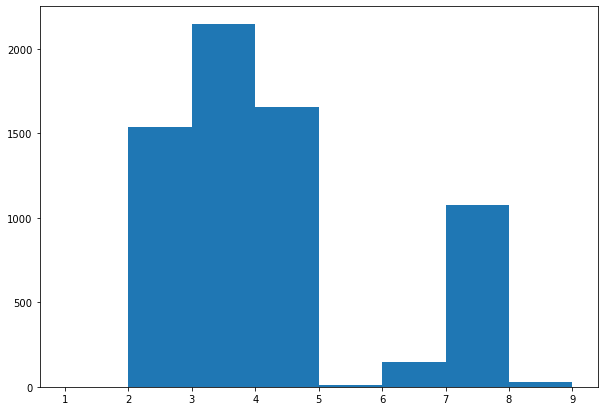

In [87]:
# By scholarship
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(no_incomes['Scholarship'], bins = [1,2,3,4,5,6,7,8,9])


(array([2637.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3960.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

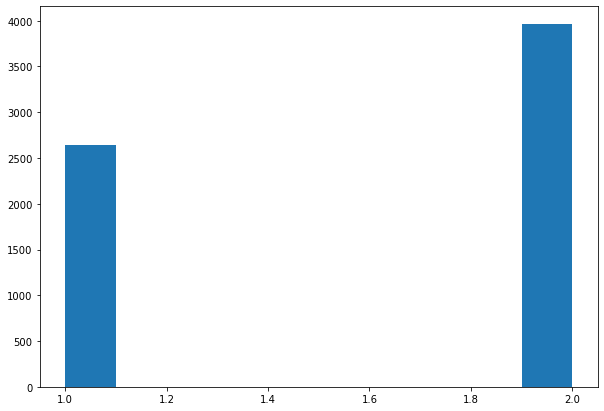

In [88]:
# By Gender
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(no_incomes['Gender'])

(array([2136., 1392.,  797.,  695.,  625.,  479.,  307.,  129.,   30.,
           7.]),
 array([12. , 20.1, 28.2, 36.3, 44.4, 52.5, 60.6, 68.7, 76.8, 84.9, 93. ]),
 <BarContainer object of 10 artists>)

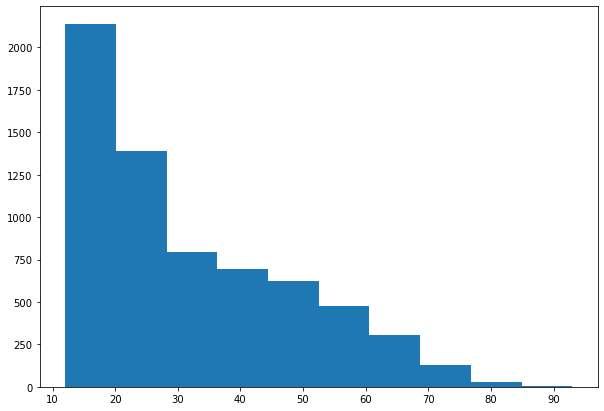

In [89]:
# By Age
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(no_incomes['Age'])

(array([   0.,    0.,    0.,    0.,    0., 6597.,    0.,    0.,    0.,
           0.]),
 array([3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5]),
 <BarContainer object of 10 artists>)

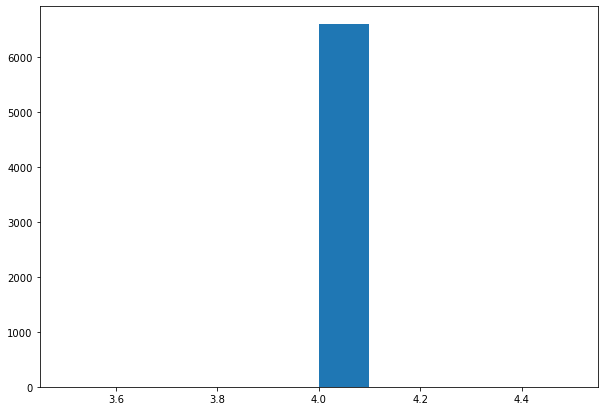

In [90]:
#By Position
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(no_incomes['By Position'])

(array([ 568.,  796.,  303.,  910.,  577.,  513., 1057.,  444.,  408.,
        1021.]),
 array([ 1. ,  4.1,  7.2, 10.3, 13.4, 16.5, 19.6, 22.7, 25.8, 28.9, 32. ]),
 <BarContainer object of 10 artists>)

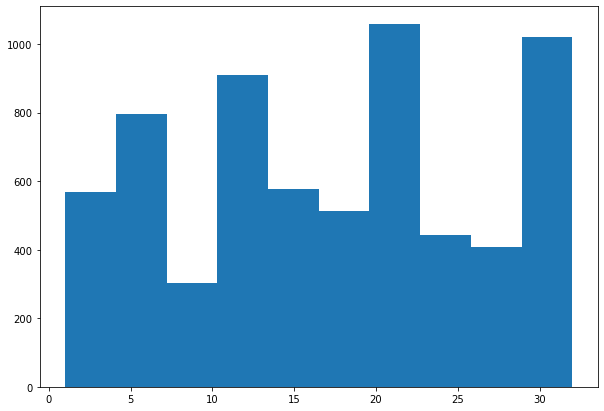

In [91]:
# By Residence
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(no_incomes['Residence'])

In [92]:
# Let's deep on the entires we have for people with incomes
with_known_incomes = new_employed[new_employed['Monthly Income']>=0]
with_known_incomes

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income
2,9,1,30,1,7,61000.0,6,1,2,1,4,16000.0
11,9,1,31,1,7,62200.0,1,1,2,1,4,12000.0
12,9,2,26,1,7,33100.0,1,1,2,3,3,8000.0
15,9,2,60,1,4,NaN,6,1,2,1,4,25000.0
17,9,2,34,1,7,33100.0,6,1,2,1,4,8000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
389422,32,2,24,1,3,NaN,6,2,2,1,3,2150.0
389425,32,1,62,1,2,NaN,5,2,2,1,1,7740.0
389428,32,2,31,1,4,NaN,4,2,2,1,4,7740.0
389429,32,2,18,1,4,NaN,6,2,2,1,3,7955.0


(array([1.1601e+04, 2.3820e+04, 2.6520e+04, 2.2207e+04, 2.2605e+04,
        1.2225e+04, 5.4520e+03, 1.3340e+03, 2.7700e+02, 1.4000e+01]),
 array([12. , 20.5, 29. , 37.5, 46. , 54.5, 63. , 71.5, 80. , 88.5, 97. ]),
 <BarContainer object of 10 artists>)

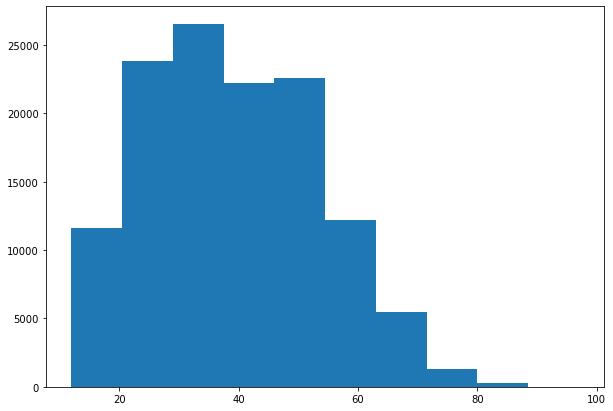

In [93]:
# By Age
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(with_known_incomes['Age'])

(array([ 4973.,  5827.,  7070.,  8455., 12316., 17259., 10037., 12366.,
         8532.]),
 array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
        10000]),
 <BarContainer object of 9 artists>)

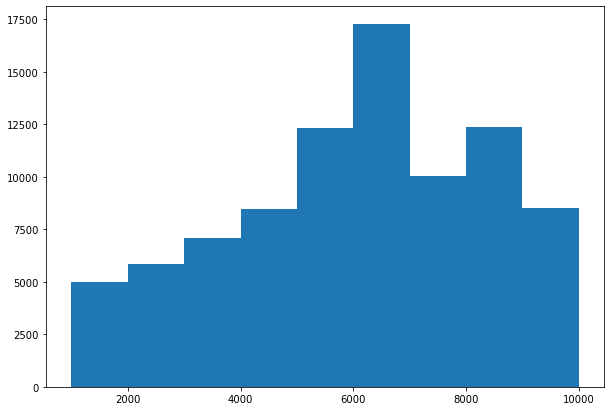

In [94]:
# By Income
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(with_known_incomes['Monthly Income'], bins = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])

In [95]:
with_known_incomes['Monthly Income'].describe()

count    126055.000000
mean       8131.892706
std        7380.446417
min           0.000000
25%        4300.000000
50%        6880.000000
75%       10000.000000
max      300000.000000
Name: Monthly Income, dtype: float64

array([[<AxesSubplot:title={'center':'Monthly Income'}>]], dtype=object)

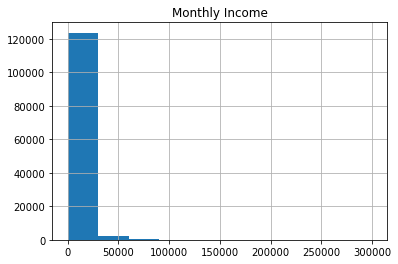

In [96]:
with_known_incomes.hist(column="Monthly Income")

In [97]:
import statistics
statistics.median(with_known_incomes['Monthly Income'])

6880.0

(array([2.6959e+04, 4.1950e+03, 1.4190e+03, 5.0100e+02, 1.9000e+02,
        1.5800e+02, 5.2000e+01, 5.0000e+01, 2.3000e+01]),
 array([ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000,
         90000, 100000]),
 <BarContainer object of 9 artists>)

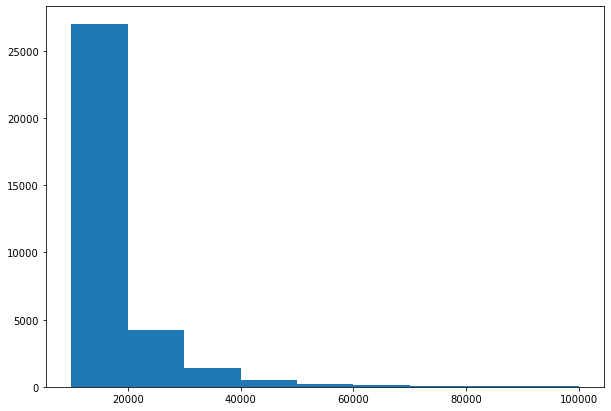

In [98]:
# By Income
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(with_known_incomes['Monthly Income'], bins = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000])

In [99]:
new_employed[new_employed['Monthly Income'].isna()]


,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income
0,9,1,59,1,7,51100.0,6,1,2,1,4,NaN
4,9,1,42,1,7,62100.0,2,1,2,1,4,NaN
5,9,2,36,1,7,101500.0,5,1,2,1,4,NaN
6,9,1,43,1,7,101600.0,5,1,2,1,4,NaN
8,9,2,72,1,2,NaN,4,1,2,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
389414,32,1,52,1,5,12200.0,5,2,2,1,4,NaN
389416,32,1,20,1,4,NaN,6,2,2,1,3,NaN
389420,32,1,66,1,2,NaN,5,2,2,3,6,NaN
389421,32,2,56,1,2,NaN,5,2,2,1,3,NaN


In [100]:
new_employed.loc[new_employed['Monthly Income'].isna(), 'Monthly Income'] = 6880


In [101]:
new_employed[new_employed['Monthly Income'].isna()]

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income


In [102]:
new_employed[new_employed['By Position'] == 4]

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income
494,9,1,16,1,3,NaN,6,1,2,4,4,0.0
641,9,2,45,1,3,NaN,5,1,2,4,3,0.0
646,9,2,68,1,2,NaN,4,1,2,4,4,0.0
908,9,2,49,1,2,NaN,1,1,2,4,4,0.0
916,9,2,24,1,2,NaN,1,1,2,4,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
389366,32,2,41,1,3,NaN,6,2,2,4,3,0.0
389367,32,1,32,1,7,31400.0,6,2,2,4,6,0.0
389375,32,1,32,1,3,NaN,5,2,2,4,6,0.0
389409,32,2,22,1,4,NaN,6,2,2,4,3,0.0


In [103]:
new_employed['Monthly Income'].describe()

count    180370.000000
mean       7754.908993
std        6196.597671
min           0.000000
25%        5590.000000
50%        6880.000000
75%        8600.000000
max      300000.000000
Name: Monthly Income, dtype: float64

In [104]:
with_known_incomes['Monthly Income'].describe()

count    126055.000000
mean       8131.892706
std        7380.446417
min           0.000000
25%        4300.000000
50%        6880.000000
75%       10000.000000
max      300000.000000
Name: Monthly Income, dtype: float64

In [105]:
entity_dict  = entity_c.set_index('CVE').T.to_dict('list')
gender_dict  = sex_c.set_index('CVE').T.to_dict('list')
literacy_dict  = literacy_c.set_index('CVE').T.to_dict('list')
scholarship_dict  = scholarship_c.set_index('CVE').T.to_dict('list')
career_dict  = career_c.set_index('CVE').T.to_dict('list')
marital_dict  = maritalstatus_c.set_index('CVE').T.to_dict('list')
urban_dict  = urban_c.set_index('CVE').T.to_dict('list')
zone_dict  = zone_c.set_index('CVE').T.to_dict('list')
ocupy_pos_dict  = ocupy_pos_c.set_index('CVE').T.to_dict('list')
sector_dict  = sector_c.set_index('CVE').T.to_dict('list')


In [106]:
new_employed['Residence'] = new_employed['Residence'].replace(entity_dict)
new_employed['Gender'] = new_employed['Gender'].replace(gender_dict)
new_employed['Literacy'] = new_employed['Literacy'].replace(literacy_dict)
new_employed['Scholarship'] = new_employed['Scholarship'].replace(scholarship_dict)
new_employed['Career'] = new_employed['Career'].replace(career_dict)
new_employed['Marital Status'] = new_employed['Marital Status'].replace(marital_dict)
new_employed['Urban or Rural'] = new_employed['Urban or Rural'].replace(urban_dict)
new_employed['Economic Zone'] = new_employed['Economic Zone'].replace(zone_dict)
new_employed['By Position'] = new_employed['By Position'].replace(ocupy_pos_dict)
new_employed['By Economic Sector'] = new_employed['By Economic Sector'].replace(sector_dict)

new_employed.loc[new_employed['Career'].isnull(), 'Career'] = 'N/A'

new_employed
# Aquí al fin tenemos la base de datos que nos interesa

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income
0,Ciudad de México,Hombre,59,Sí,Profesional,Biología,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,6880.0
2,Ciudad de México,Hombre,30,Sí,Profesional,Planes multidisciplinarios o generales del cam...,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,16000.0
4,Ciudad de México,Hombre,42,Sí,Profesional,Telecomunicaciones,Está separado(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,6880.0
5,Ciudad de México,Mujer,36,Sí,Profesional,Gastronomía y servicios de alimentos,Está casado(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,6880.0
6,Ciudad de México,Hombre,43,Sí,Profesional,Hospitalidad y turismo,Está casado(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,6880.0
...,...,...,...,...,...,...,...,...,...,...,...,...
389425,Zacatecas,Hombre,62,Sí,Primaria,N/A,Está casado(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Construcción,7740.0
389428,Zacatecas,Mujer,31,Sí,Preparatoria o bachillerato,N/A,Está viudo(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,7740.0
389429,Zacatecas,Mujer,18,Sí,Preparatoria o bachillerato,N/A,Está soltero(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Comercio,7955.0
389430,Zacatecas,Hombre,54,Sí,Primaria,N/A,Está casado(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores por cuenta propia,Servicios,6880.0


In [107]:
#the same for with incomes df, just in case
with_known_incomes['Residence'] = with_known_incomes['Residence'].replace(entity_dict)
with_known_incomes['Gender'] = with_known_incomes['Gender'].replace(gender_dict)
with_known_incomes['Literacy'] = with_known_incomes['Literacy'].replace(literacy_dict)
with_known_incomes['Scholarship'] = with_known_incomes['Scholarship'].replace(scholarship_dict)
with_known_incomes['Career'] = with_known_incomes['Career'].replace(career_dict)
with_known_incomes['Marital Status'] = with_known_incomes['Marital Status'].replace(marital_dict)
with_known_incomes['Urban or Rural'] = with_known_incomes['Urban or Rural'].replace(urban_dict)
with_known_incomes['Economic Zone'] = with_known_incomes['Economic Zone'].replace(zone_dict)
with_known_incomes['By Position'] = with_known_incomes['By Position'].replace(ocupy_pos_dict)
with_known_incomes['By Economic Sector'] = with_known_incomes['By Economic Sector'].replace(sector_dict)

with_known_incomes.loc[with_known_incomes['Career'].isnull(), 'Career'] = 'N/A'

with_known_incomes
# Aquí al fin tenemos la base de datos que nos interesa

<ipython-input-107-cf28f8545ab3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_known_incomes['Residence'] = with_known_incomes['Residence'].replace(entity_dict)
<ipython-input-107-cf28f8545ab3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_known_incomes['Gender'] = with_known_incomes['Gender'].replace(gender_dict)
<ipython-input-107-cf28f8545ab3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income
2,Ciudad de México,Hombre,30,Sí,Profesional,Planes multidisciplinarios o generales del cam...,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,16000.0
11,Ciudad de México,Hombre,31,Sí,Profesional,Informática,Vive con su pareja en unión libre,Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,12000.0
12,Ciudad de México,Mujer,26,Sí,Profesional,Derecho,Vive con su pareja en unión libre,Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores por cuenta propia,Comercio,8000.0
15,Ciudad de México,Mujer,60,Sí,Preparatoria o bachillerato,N/A,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,25000.0
17,Ciudad de México,Mujer,34,Sí,Profesional,Derecho,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,8000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
389422,Zacatecas,Mujer,24,Sí,Secundaria,N/A,Está soltero(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Comercio,2150.0
389425,Zacatecas,Hombre,62,Sí,Primaria,N/A,Está casado(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Construcción,7740.0
389428,Zacatecas,Mujer,31,Sí,Preparatoria o bachillerato,N/A,Está viudo(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,7740.0
389429,Zacatecas,Mujer,18,Sí,Preparatoria o bachillerato,N/A,Está soltero(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Comercio,7955.0


In [108]:
print(new_employed.info())
print(with_known_incomes.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180370 entries, 0 to 389432
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Residence           180370 non-null  object 
 1   Gender              180370 non-null  object 
 2   Age                 180370 non-null  int64  
 3   Literacy            180370 non-null  object 
 4   Scholarship         180370 non-null  object 
 5   Career              180370 non-null  object 
 6   Marital Status      180370 non-null  object 
 7   Urban or Rural      180370 non-null  object 
 8   Economic Zone       180370 non-null  object 
 9   By Position         180370 non-null  object 
 10  By Economic Sector  180370 non-null  object 
 11  Monthly Income      180370 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 17.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 126055 entries, 2 to 389432
Data columns (total 12 columns):
 #   Colu

In [109]:
print('Residence')
print(new_employed['Residence'].value_counts())
print('')
print('Gender')
print(new_employed['Gender'].value_counts())
print('')
print('Literacy')
print(new_employed['Literacy'].value_counts())
print('')
print('Scholarship')
print(new_employed['Scholarship'].value_counts())
print('')
print('Marital Status')
print(new_employed['Marital Status'].value_counts())
print('')
print('Urban or Rural')
print(new_employed['Urban or Rural'].value_counts())
print('')
print('Economic Zone')
print(new_employed['Economic Zone'].value_counts())
print('')
print('By Position')
print(new_employed['By Position'].value_counts())
print('')
print('By Economic Sector')
print(new_employed['By Economic Sector'].value_counts())

Residence
Chiapas                8179
México                 7421
Veracruz               7385
Coahuila               7334
Guanajuato             7234
Tamaulipas             7005
Chihuahua              6788
Campeche               6752
Baja California        6708
Jalisco                6279
Puebla                 6162
Nuevo León             5935
Oaxaca                 5679
Durango                5485
Yucatán                5366
Nayarit                5259
Tlaxcala               5235
Michoacán              5171
Sinaloa                5111
San Luis Potosí        5017
Tabasco                5000
Guerrero               4961
Aguascalientes         4955
Zacatecas              4825
Querétaro              4718
Sonora                 4694
Colima                 4513
Hidalgo                4399
Quintana Roo           4354
Ciudad de México       4329
Morelos                4159
Baja California Sur    3958
Name: Residence, dtype: int64

Gender
Hombre    105201
Mujer      75169
Name: Gender, dtype: i

In [110]:
# Convertir a binario
rel_columns = ['Age','Gender', 'Literacy', 'Scholarship','Career', 'Marital Status', 'Urban or Rural', 'Residence','Economic Zone', 'By Position','By Economic Sector', 'Monthly Income']
dummy_data = pd.get_dummies(new_employed[rel_columns], drop_first=True, dtype=float)
dummy_data                                                         

,Age,Monthly Income,Gender_Mujer,Literacy_Sí,Scholarship_Doctorado,Scholarship_Maestría,Scholarship_Normal,Scholarship_Preparatoria o bachillerato,Scholarship_Primaria,Scholarship_Profesional,...,By Position_No aplica,By Position_Trabajadores por cuenta propia,By Position_Trabajadores sin pago,By Position_Trabajadores subordinados y remunerados,By Economic Sector_Comercio,By Economic Sector_Construcción,By Economic Sector_Industria manufacturera,By Economic Sector_No aplica,By Economic Sector_Otros,By Economic Sector_Servicios
0,59,6880.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,30,16000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,42,6880.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,36,6880.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,43,6880.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389425,62,7740.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
389428,31,7740.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
389429,18,7955.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
389430,54,6880.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [111]:
dummy_data.columns

Index(['Age', 'Monthly Income', 'Gender_Mujer', 'Literacy_Sí',
       'Scholarship_Doctorado', 'Scholarship_Maestría', 'Scholarship_Normal',
       'Scholarship_Preparatoria o bachillerato', 'Scholarship_Primaria',
       'Scholarship_Profesional',
       ...
       'By Position_No aplica', 'By Position_Trabajadores por cuenta propia',
       'By Position_Trabajadores sin pago',
       'By Position_Trabajadores subordinados y remunerados',
       'By Economic Sector_Comercio', 'By Economic Sector_Construcción',
       'By Economic Sector_Industria manufacturera',
       'By Economic Sector_No aplica', 'By Economic Sector_Otros',
       'By Economic Sector_Servicios'],
      dtype='object', length=232)

In [112]:
y = dummy_data['Gender_Mujer']
X = dummy_data.drop(columns=['Gender_Mujer'], axis=1)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [114]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [115]:
y_hat_train = logreg.predict(X_train)

train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0.0    90474
1.0    44803
Name: Residuals (counts), dtype: int64

0.0    0.668805
1.0    0.331195
Name: Residuals (proportions), dtype: float64


In [116]:
y_hat_test = logreg.predict(X_test)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0.0    30049
1.0    15044
Name: Residuals (counts), dtype: int64

0.0    0.666378
1.0    0.333622
Name: Residuals (proportions), dtype: float64


In [117]:
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[21010  5269]
 [ 9775  9039]]


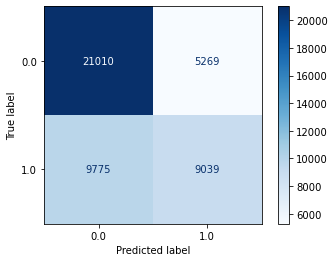

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model_log.classes_)
disp.plot(cmap=plt.cm.Blues)

In [119]:
# Evaluating Regression Model
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.6347266281022579
Testing Precision:  0.6317444786133631



Training Recall:  0.4828675361547334
Testing Recall:  0.480440097799511



Training Accuracy:  0.668805487998699
Testing Accuracy:  0.6663783735834831



Training F1-Score:  0.5484797484555615
Testing F1-Score:  0.5458003743735281


Train AUC: 0.7308809085264864
Test AUC: 0.6399688977905047


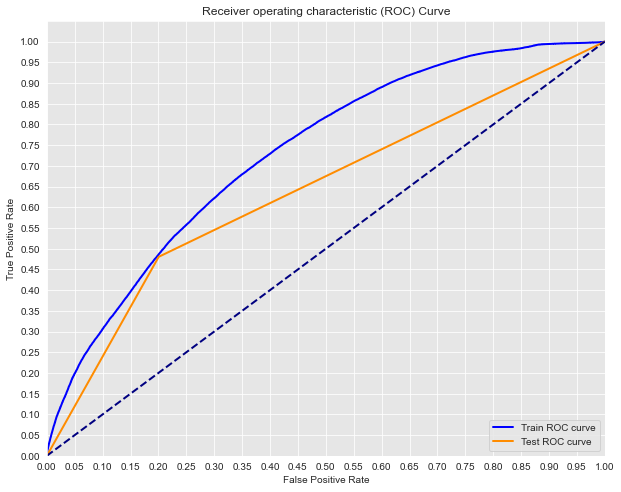

In [120]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [121]:
logregi = LogisticRegression(fit_intercept=True, C=1e16, solver='liblinear')
logregi.fit(X_train, y_train)

LogisticRegression(C=1e+16, solver='liblinear')

Scikit-learn Model 1 Test AUC: 0.7272523515992717
Scikit-learn Model 1 Train AUC: 0.7308809085264864
Scikit-learn Model 2 with intercept Test AUC: 0.7325142388114607
Scikit-learn Model 2 with intercept Train AUC: 0.7355892770466654


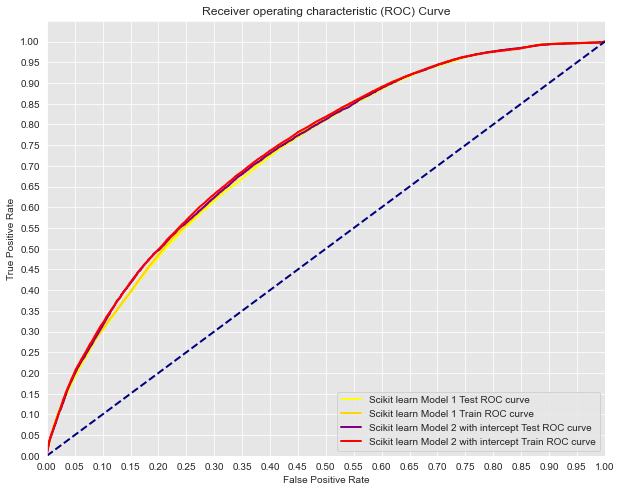

In [122]:
plt.figure(figsize=(10,8))
lw = 2
# Second model plots
y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 1 Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 1 Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='yellow',
         lw=lw, label='Scikit learn Model 1 Test ROC curve')
plt.plot(train_fpr, train_tpr, color='gold',
         lw=lw, label='Scikit learn Model 1 Train ROC curve')


# Third model plots
y_test_score = logregi.decision_function(X_test)
y_train_score = logregi.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 2 with intercept Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 2 with intercept Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='purple',
         lw=lw, label='Scikit learn Model 2 with intercept Test ROC curve')
plt.plot(train_fpr, train_tpr, color='red',
         lw=lw, label='Scikit learn Model 2 with intercept Train ROC curve')

# Formatting
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Second Try- Regression Tree

In [123]:
dummy_data

,Age,Monthly Income,Gender_Mujer,Literacy_Sí,Scholarship_Doctorado,Scholarship_Maestría,Scholarship_Normal,Scholarship_Preparatoria o bachillerato,Scholarship_Primaria,Scholarship_Profesional,...,By Position_No aplica,By Position_Trabajadores por cuenta propia,By Position_Trabajadores sin pago,By Position_Trabajadores subordinados y remunerados,By Economic Sector_Comercio,By Economic Sector_Construcción,By Economic Sector_Industria manufacturera,By Economic Sector_No aplica,By Economic Sector_Otros,By Economic Sector_Servicios
0,59,6880.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,30,16000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,42,6880.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,36,6880.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,43,6880.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389425,62,7740.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
389428,31,7740.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
389429,18,7955.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
389430,54,6880.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [124]:
dummy_wk_incomes = pd.get_dummies(with_known_incomes[rel_columns], drop_first=True, dtype=float)
dummy_wk_incomes 

,Age,Monthly Income,Gender_Mujer,Literacy_Sí,Scholarship_Doctorado,Scholarship_Maestría,Scholarship_Normal,Scholarship_Preparatoria o bachillerato,Scholarship_Primaria,Scholarship_Profesional,...,Residence_Zacatecas,Economic Zone_Zona 2 Resto del paÃ­s,By Position_Trabajadores por cuenta propia,By Position_Trabajadores sin pago,By Position_Trabajadores subordinados y remunerados,By Economic Sector_Comercio,By Economic Sector_Construcción,By Economic Sector_Industria manufacturera,By Economic Sector_Otros,By Economic Sector_Servicios
2,30,16000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11,31,12000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12,26,8000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15,60,25000.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17,34,8000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389422,24,2150.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
389425,62,7740.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
389428,31,7740.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
389429,18,7955.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [126]:
target = dummy_data['Monthly Income']
features = dummy_data.drop(columns=['Monthly Income'], axis=1)
print(target.describe())

count    180370.000000
mean       7754.908993
std        6196.597671
min           0.000000
25%        5590.000000
50%        6880.000000
75%        8600.000000
max      300000.000000
Name: Monthly Income, dtype: float64


In [128]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features=pd.DataFrame(scaler.fit_transform(features),
            columns=features.columns, index=features.index) 

ValueError: num must be 1 <= num <= 12, not 13

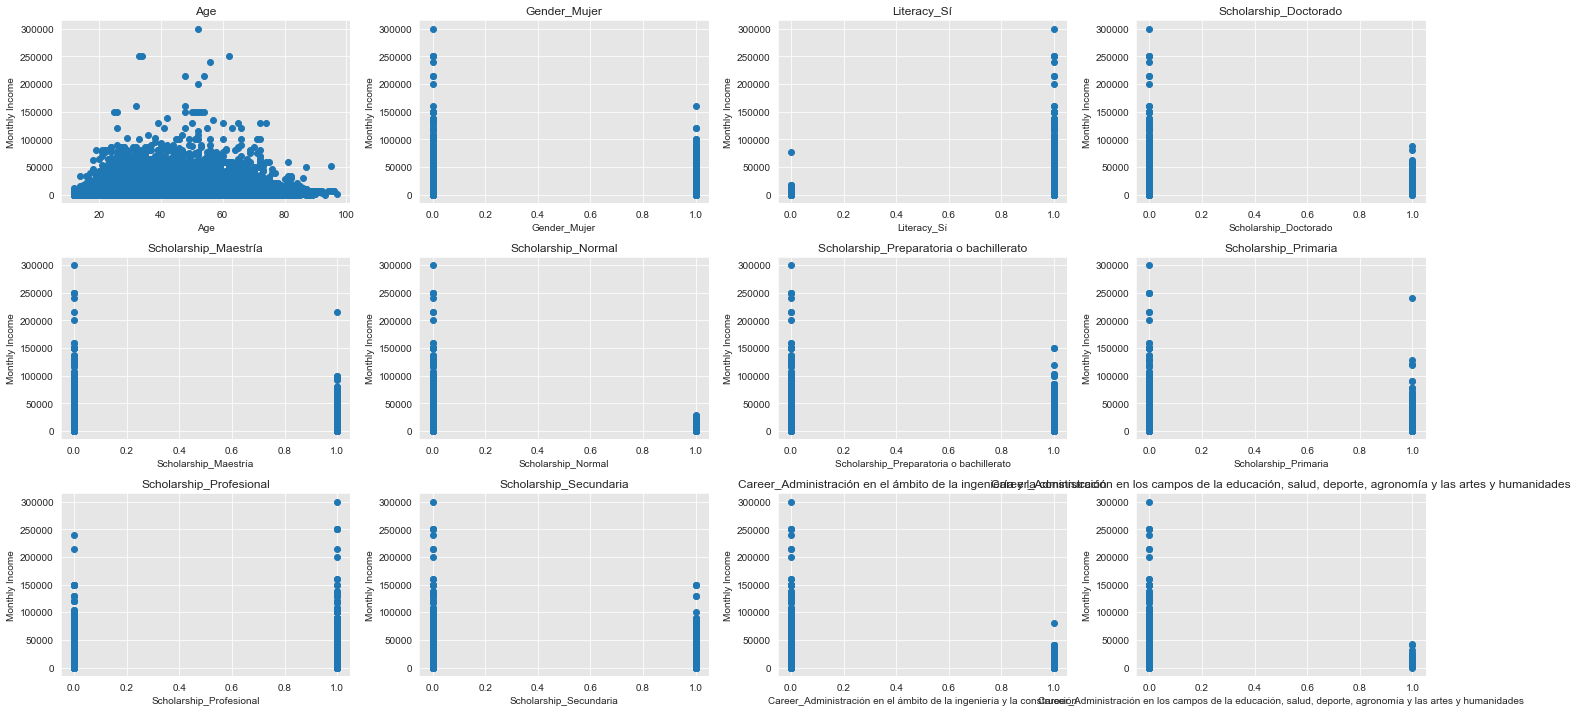

In [129]:
import matplotlib.pyplot as plt
employed.corr()['Monthly Income']

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Define the function
def performance(y_true, y_predict):
    r2 = r2_score(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    return [r2, rmse]



# Split the data into training and test subsets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [131]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor 
# Set random_state=45
regressor = DecisionTreeRegressor(random_state=45)

# Fit the model to training data
regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(x_test)

# Calculate performance using the performance() function 
score = performance(y_test, y_pred)
score

[-0.5321277242578646, 7398.679736677274]

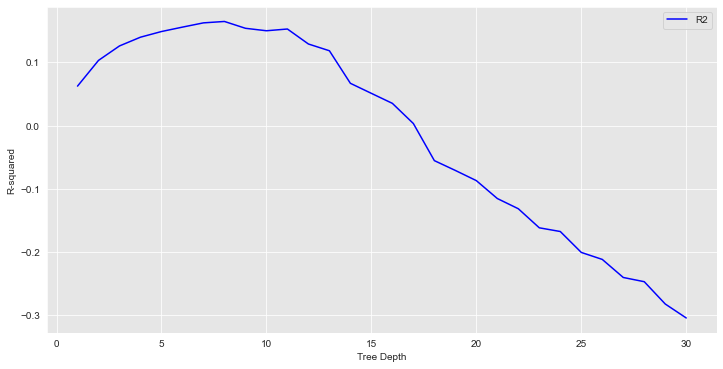

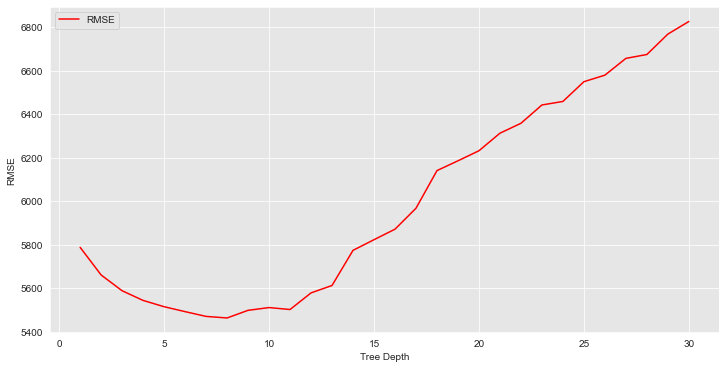

In [132]:
# Identify the optimal tree depth for given data
max_depths = list(range(1, 31))
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=max_depth, 
                                      random_state=45)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_depths, mse_results, 'r', label='RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

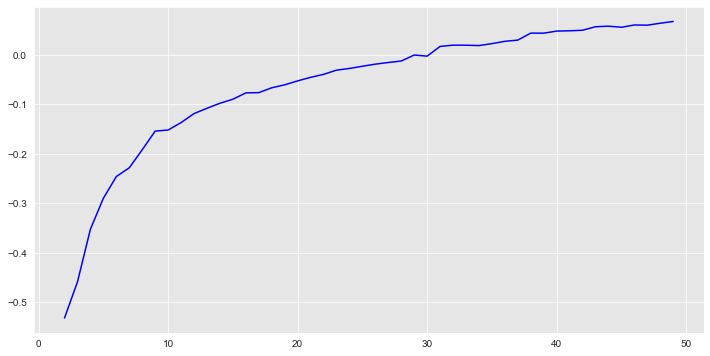

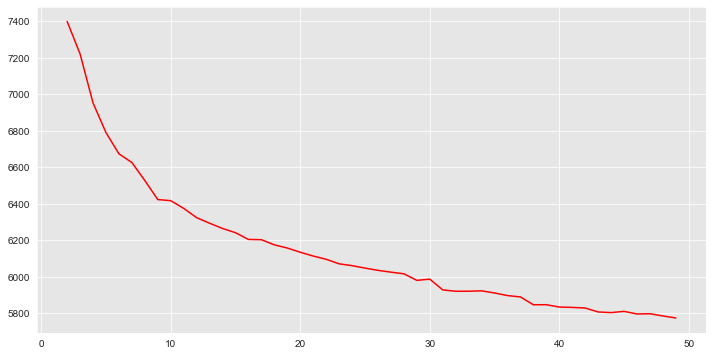

In [135]:
# Identify the optimal minimum split size for given data
min_samples_splits = np.arange(2, 50)
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(min_samples_split=int(min_samples_split),
                                      random_state=45)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, mse_results, 'r', label='RMSE')
plt.show()

In [142]:
regressor = DecisionTreeRegressor(min_samples_split=8, max_depth=100, splitter='best', min_samples_leaf= 100)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
score = performance(y_test, y_pred)
score[0], score[1], regressor

(0.1842684489272458,
 5398.590338737126,
 DecisionTreeRegressor(max_depth=100, min_samples_leaf=100, min_samples_split=8))

In [143]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Score is:', r2_score(y_test, y_pred))

Mean Absolute Error: 2908.962297366514
Mean Squared Error: 29144777.64550584
Root Mean Squared Error: 5398.590338737126
R Squared Score is: 0.1842684489272458


In [144]:
new_employed

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income
0,Ciudad de México,Hombre,59,Sí,Profesional,Biología,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,6880.0
2,Ciudad de México,Hombre,30,Sí,Profesional,Planes multidisciplinarios o generales del cam...,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,16000.0
4,Ciudad de México,Hombre,42,Sí,Profesional,Telecomunicaciones,Está separado(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,6880.0
5,Ciudad de México,Mujer,36,Sí,Profesional,Gastronomía y servicios de alimentos,Está casado(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,6880.0
6,Ciudad de México,Hombre,43,Sí,Profesional,Hospitalidad y turismo,Está casado(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,6880.0
...,...,...,...,...,...,...,...,...,...,...,...,...
389425,Zacatecas,Hombre,62,Sí,Primaria,N/A,Está casado(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Construcción,7740.0
389428,Zacatecas,Mujer,31,Sí,Preparatoria o bachillerato,N/A,Está viudo(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,7740.0
389429,Zacatecas,Mujer,18,Sí,Preparatoria o bachillerato,N/A,Está soltero(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Comercio,7955.0
389430,Zacatecas,Hombre,54,Sí,Primaria,N/A,Está casado(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores por cuenta propia,Servicios,6880.0


In [145]:
with_known_incomes

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income
2,Ciudad de México,Hombre,30,Sí,Profesional,Planes multidisciplinarios o generales del cam...,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,16000.0
11,Ciudad de México,Hombre,31,Sí,Profesional,Informática,Vive con su pareja en unión libre,Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,12000.0
12,Ciudad de México,Mujer,26,Sí,Profesional,Derecho,Vive con su pareja en unión libre,Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores por cuenta propia,Comercio,8000.0
15,Ciudad de México,Mujer,60,Sí,Preparatoria o bachillerato,N/A,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,25000.0
17,Ciudad de México,Mujer,34,Sí,Profesional,Derecho,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,8000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
389422,Zacatecas,Mujer,24,Sí,Secundaria,N/A,Está soltero(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Comercio,2150.0
389425,Zacatecas,Hombre,62,Sí,Primaria,N/A,Está casado(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Construcción,7740.0
389428,Zacatecas,Mujer,31,Sí,Preparatoria o bachillerato,N/A,Está viudo(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,7740.0
389429,Zacatecas,Mujer,18,Sí,Preparatoria o bachillerato,N/A,Está soltero(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Comercio,7955.0


In [200]:
new_employed.to_csv('Data/new_employed.csv')
with_known_incomes.to_csv('Data/wk_incomes.csv')

# Regression Tree without features

In [198]:
y = with_known_incomes['Monthly Income']
X = with_known_incomes.drop(columns=['Monthly Income'], axis=1)

rela_columns = ['Age','Gender','Scholarship','Literacy', 'Urban or Rural','By Economic Sector','Economic Zone',  'Career', 'By Position',  'Marital Status', 'Residence']
X = pd.get_dummies(X[rela_columns], drop_first=True, dtype=float)

scaler = MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),
            columns=X.columns, index=X.index) 

X.shape

(126055, 219)

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rt = DecisionTreeRegressor(min_samples_split=8, max_depth=100, splitter='best', min_samples_leaf= 100)

model_r = rt.fit(X_train, y_train)

y_pred = model_r.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Score is:', r2_score(y_test, y_pred))

Mean Absolute Error: 3393.8610244019073
Mean Squared Error: 39224101.1876245
Root Mean Squared Error: 6262.914751744949
R Squared Score is: 0.27543728098115017


Mean Absolute Error: 3508.867142214744
Mean Squared Error: 38752427.06191816
Root Mean Squared Error: 6225.144742246413
R Squared Score is: 0.25999453014215923
